In [ ]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/%s/Results.txt'
path_annotation = '/home/juan/Desktop/juan/bio/mirna_mite/data/introns.gff3'
path_annotation_promoters = '/home/juan/Desktop/juan/bio/mirna_mite/data/promoters.gff3'
path_annotation_intron_exon = '/home/juan/Desktop/juan/bio/mirna_mite/data/ann_intron_exon.gff'
path_annotation_three_five = '/home/juan/Desktop/juan/bio/mirna_mite/data/ann_three_five.gff'
path_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.csv'
path_mirna_seq = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirna.y.fasta'
path_mirna_seq_trep = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirna.y.trep.fasta'
path_mirna_mites_seq = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirna.mites.y.fasta'
path_mirna_mature = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirna.y.mature.csv'
path_res_seq = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.fasta'
experiments = ['mrcv_mites','mrcv_all','sun_all','sun_mites']
path_genome = '/home/juan/Desktop/juan/bio/data/IWGSC/42/Triticum_aestivum.IWGSC.dna.toplevel.fa'
path_blast_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/blast_mites.csv'
path_mirbase = '/home/juan/Desktop/juan/bio/mirna_mite/data/mature.fa'

In [87]:
### Load shortstack results
dfs = {}
for experiment in experiments:
    experiment_path = path % (experiment,)
    df = pd.read_csv(experiment_path, sep='\t')
    df['Name'] = experiment + '_' + df['Name']
    print('Experiment:', experiment)
    print('All results:',len(df.index))
    #df = df[df.MIRNA == 'Y']
    #print('Only miRNAs:',len(df.index))
    df = df[df.Reads > 15]
    print('Only miRNAs +20 reads:',len(df.index))
    df = df[df['21'] > 10]
    print('Only miRNAs 21nt +5 reads:',len(df.index))
    print('*' * 10)
    dfs[experiment] = df

Experiment: mrcv_mites
All results: 1211339
Only miRNAs +20 reads: 27597
Only miRNAs 21nt +5 reads: 1751
**********
Experiment: mrcv_all
All results: 38532
Only miRNAs +20 reads: 38532
Only miRNAs 21nt +5 reads: 10778
**********
Experiment: sun_all
All results: 157492
Only miRNAs +20 reads: 157492
Only miRNAs 21nt +5 reads: 44964
**********
Experiment: sun_mites
All results: 1211339
Only miRNAs +20 reads: 62212
Only miRNAs 21nt +5 reads: 3609
**********


In [88]:
dfs = [ v for v in dfs.values() ]

In [89]:
df = pd.concat(dfs)

In [90]:
len(df.index)

61102

In [91]:
df.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
669,1A:7191963-7192334,mrcv_mites_MITE_T_7077|chr2B|403696383|4036967...,372,65,0.510,4,0.031,-,UUUUUUGUCGAGAGUUGCUCA,36,...,21,N15,-1.0,4,0,13,38,0,0,10
777,1A:8267612-8267880,mrcv_mites_MITE_T_22970|chr5A|493341243|493341...,269,122,0.957,9,0.361,.,AGUUUGACUUCGGAGAAUUCUAAU,25,...,24,N6,0.2,0,5,0,25,2,5,85


In [92]:
df['seqname'] = df['#Locus'].str.split(':').str[0]
df['position'] = df['#Locus'].str.split(':').str[1]
df['start'] = df.position.str.split('-').str[0].astype(int)
df['end'] = df.position.str.split('-').str[1].astype(int)

In [93]:
df = df.reset_index(drop=True)


In [94]:
print(len(df.index))

61102


In [95]:
df[df.index.isin(['876749','876750','876751','27433'])]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Long,20,21,22,23,24,seqname,position,start,end
27433,3B:262192194-262193584,sun_all_Cluster_55362,1391,457,3.619,302,0.341,.,UGGAAAAAUAUAGGAUGGCCGAAU,16,...,4,18,25,25,46,317,3B,262192194-262193584,262192194,262193584


In [ ]:
min_distance = 60
duplicated = []
for k,v in df.iterrows():
    if k in duplicated:
        continue
    other = df[(df.index != k) & 
                (df.seqname == v.seqname) &
                (df.MajorRNA == v.MajorRNA) &
                (abs(df.start - v.start) <= min_distance) & 
                (abs(df.end - v.end) <= min_distance)]
    if len(other.index) > 0:
        duplicated += other.index.tolist()

In [ ]:
duplicated = set(duplicated)
print(len(duplicated))

In [ ]:
print(len(df.index))

In [ ]:
df = df[~df.index.isin(duplicated)]
count_total = len(df.index)
count_total

In [ ]:
df.MIRNA.value_counts()

In [ ]:
df.MIRNA.value_counts().plot('bar')

In [ ]:
len(df[df.MIRNA == 'Y'].index)

In [ ]:
df = df[df.MIRNA == 'Y']
print('Only miRNAs:',len(df.index))

In [ ]:
df.head(3)

In [ ]:
df_mites = df[df.Name.str.contains('MITE')]
count_mites = len(df_mites.index)
count_mites

In [ ]:
df_nomites = df[~df.Name.str.contains('MITE')]
count_nomites = len(df_nomites.index)
count_nomites

In [ ]:
count_mites * 100 / count_total

In [ ]:
#get sequences
df.sort_values(['seqname', 'start'], inplace=True)


In [ ]:
fasta_seq = SeqIO.parse(path_genome, 'fasta')
   

In [26]:
buffer_seqs = []
for record in fasta_seq:
    dff_extract = df[df.seqname == record.id]
    print(record.id, len(dff_extract.index))
    clean_seq = ''.join(str(record.seq).splitlines())
    for k,v in dff_extract.iterrows():
        start = min(v.start,v.end)
        end = max(v.start,v.end)
        new_seq = clean_seq[start:end]
        id = v.Name
        desc = record.id + "_" + str(start) + '_' + str(end)
        seq = SeqRecord(Seq(new_seq), id=id, description=desc)
        buffer_seqs.append(seq)
SeqIO.write(buffer_seqs, path_res_seq, "fasta")
print(path_res_seq)

1A 5
1B 6
1D 6
2A 13
2B 18
2D 5
3A 10
3B 9
3D 11
4A 15
4B 8
4D 9
5A 20
5B 16
5D 20
6A 18
6B 17
6D 16
7A 14
7B 17
7D 5
Un 2
/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.fasta


In [ ]:
path_res_seq

In [ ]:
df_trep = pd.read_csv(path_blast_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_trep.columns = cols
df_trep = df_trep[df_trep.pident >= 80]
df_trep = df_trep[df_trep.qcovs >= 80]
print(len(df_trep.index))
df_trep.head(2)

In [ ]:
len(df_trep.qseqid.unique())

In [ ]:
df_trep['MITE'] = df_trep.groupby(['qseqid'])['sseqid'].transform(lambda x: ','.join(x))


In [ ]:
df_trep = df_trep[['qseqid','MITE']]

In [ ]:
df_trep.head(2)

In [ ]:
df_trep = df_trep.drop_duplicates(subset=['qseqid'], keep='first')


In [ ]:
df_trep.head(2)

In [ ]:
len(df_trep.index)

In [ ]:
df = pd.merge(df, df_trep, how='left', left_on='Name', right_on='qseqid')

In [ ]:
df.drop("qseqid", axis=1, inplace=True)

In [ ]:
df.head(2)

In [ ]:
total_count = len(df.index)
total_count

In [ ]:
df_new_not_mites = df[df.MITE.isnull()]
count_not_mites = len(df_new_not_mites.index)
count_not_mites

In [ ]:
df_new_mites = df[df.MITE.notnull()]
count_mites = len(df_new_mites.index)
count_mites

In [ ]:
count_mites * 100 / total_count

In [ ]:
#mirbase

In [ ]:
buffer_seqs = []
for k,v in df.iterrows():
    id = v.Name
    desc = v['#Locus']
    if "|" in id:
        id = id.split("|")[0]
    seq = SeqRecord(Seq(v.MajorRNA), id=id, description="")
    buffer_seqs.append(seq)
SeqIO.write(buffer_seqs, path_mirna_seq, "fasta")
print(len(buffer_seqs))
print(path_mirna_seq)

In [ ]:
df_trep[df_trep.qseqid.str.contains('121053')]

In [ ]:
buffer_seqs = []
for k,v in df[df.MITE.notnull()].iterrows():
    id = v.Name
    desc = v['#Locus']
    if "|" in id:
        id = id.split("|")[0]
    seq = SeqRecord(Seq(v.MajorRNA), id=id, description="")
    buffer_seqs.append(seq)
SeqIO.write(buffer_seqs, path_mirna_seq_trep, "fasta")
print(len(buffer_seqs))
print(path_mirna_seq_trep)

In [ ]:
df_mirbase = pd.read_csv(path_mirna_mature, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)

In [ ]:
allowed_mirbase_mismatches = 7
mirbase_qlen = 7

In [ ]:
df_mirbase = df_mirbase[df_mirbase.length > df_mirbase.qlen - mirbase_qlen]
print(len(df_mirbase.index))


In [ ]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= allowed_mirbase_mismatches]
print(len(df_mirbase.index))


In [ ]:
len(df_mirbase.qseqid.unique().tolist())


In [ ]:
df_mirbase = df_mirbase[['qseqid','sseqid']]


In [ ]:
df_mirbase['mirbase'] = df_mirbase.groupby(['qseqid'])['sseqid'].transform(lambda x: ','.join(x))


In [ ]:
df_mirbase = df_mirbase[['qseqid','mirbase']]

In [ ]:
df_mirbase = df_mirbase.drop_duplicates(subset=['qseqid'], keep='first')


In [ ]:
print(len(df_mirbase.index))
df_mirbase.head(2)

In [ ]:
df = pd.merge(df, df_mirbase, how='left', left_on='Name', right_on='qseqid')

In [ ]:
df.drop("qseqid", axis=1, inplace=True)

In [ ]:
df.head(2)

In [ ]:
len(df.index)

In [ ]:
#genomic annotation

In [65]:
df_ann_promoters = pd.read_csv(path_annotation_promoters, index_col=False, sep='\t', comment='#', header=None)
df_ann_promoters.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_ann_promoters.index))


120744


In [71]:
df['annotation'] = 'intergenic'

In [72]:
for k,v in df.iterrows():
    other = df_ann_promoters[df_ann_promoters.seqname == v.seqname]
    other = other[(other.end >= v.start) & (other.start <= v.end)]
    if len(other.index) > 0:
        features = set(other.feature.tolist())
        str_features = ', '.join(features)
        if df.loc[k, 'annotation'] == 'three_prime_UTR' or df.loc[k, 'annotation'] == 'five_prime_UTR':
            continue
        df.loc[k, 'annotation'] = str_features

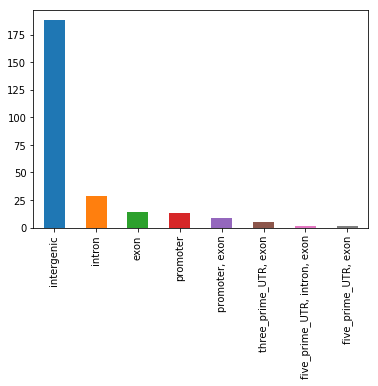

In [73]:
df.annotation.value_counts().plot('bar')

In [ ]:
df_ann_promoters = pd.read_csv(path_annotation_promoters, index_col=False, sep='\t', comment='#', header=None)
df_ann_promoters.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_ann_promoters.index))


In [74]:
#let's have some fun with data

In [75]:
df[df.MITE.notnull()].annotation.value_counts()

intron                   14
intergenic               10
three_prime_UTR, exon     2
promoter                  2
Name: annotation, dtype: int64

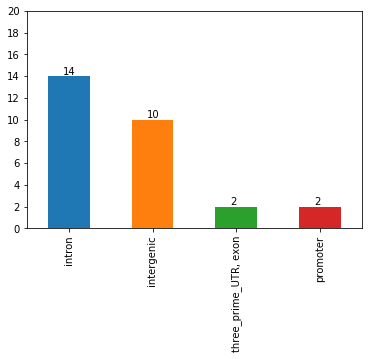

In [76]:
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot
ax = df[df.MITE.notnull()].annotation.value_counts().plot('bar')
x_offset = -0.07
y_offset = 0.15
ax.set_ylim(0,20)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax
pyplot.savefig('../data/res/1.png',transparent=True, bbox_inches='tight', pad_inches=0)

In [77]:
len(df.index)

260

In [78]:
print(len(df[df.MITE.notnull()].index))
df[df.MITE.notnull()]

28


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,7,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron
11,1D:147896240-147896319,mrcv_mites_MITE_T_120271|chr2D|74975911|749759...,80,45,0.353,1,1.000,+,UAUAUUUUGGUACGGAGGGAU,22,...,1,0,0,1D,147896240-147896319,147896240,147896319,"MITE_1717,MITE_1717,MITE_233,MITE_233,MITE_18,...",NaN,intron
17,2A:133702671-133702770,sun_mites_MITE_T_99232|chr3B|765723509|7657236...,100,2289,18.126,2181,0.983,+,UGAGACGGGUAAUUUGGAACGGAG,1484,...,53,101,2001,2A,133702671-133702770,133702671,133702770,"DTT_Tmon_Icarus_BG607724-1,DTT_Tmon_Icarus_BG6...",NaN,promoter
20,2A:168984136-168984233,mrcv_mites_MITE_T_102616|chr1B|301273397|30127...,98,198,1.554,2,0.045,-,UCGGAAUUAGUUGACACUCAAA,86,...,89,63,1,2A,168984136-168984233,168984136,168984233,"MITE_253,MITE_253,MITE_293,MITE_1428,DTT_Taes_...",NaN,intron
30,2B:5671327-5671460,sun_all_Cluster_28681,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,...,5,2,4,2B,5671327-5671460,5671327,5671460,"MITE_798,MITE_798,MITE_148,MITE_148,DTT_Hvul_P...",NaN,intron
37,2B:482720682-482720772,sun_all_Cluster_33132,91,102,0.808,91,0.078,-,AUCUUCUAUCGUGGGACGAAG,48,...,1,1,1,2B,482720682-482720772,482720682,482720772,"MITE_1444,MITE_1444,MITE_1030,MITE_1030,DTT_Ta...",NaN,intron
44,2B:720801630-720801713,mrcv_all_Cluster_8534,84,505,3.963,486,1.000,+,AUUGAACUAAGGAGGGGUGGA,386,...,5,0,0,2B,720801630-720801713,720801630,720801713,"MITE_1643,MITE_1643",NaN,intron
53,3A:19302861-19302943,mrcv_mites_MITE_T_105526|chr3A|638201844|63820...,83,108,0.848,10,0.972,+,UCCAAUUACUCGUCGUGGUUU,89,...,4,0,3,3A,19302861-19302943,19302861,19302943,"MITE_1128,MITE_1128,MITE_792,MITE_792,MITE_975...",tae-miR5175-5p,intron
62,3A:746087222-746087306,mrcv_all_Cluster_12767,85,181,1.421,16,0.000,-,UAAUAUGGAUUGGAGGGGGUA,74,...,3,5,13,3A,746087222-746087306,746087222,746087306,MITE_660,oan-miR-1400-3p,"three_prime_UTR, exon"


In [79]:
#list(df[df.MITE.notnull()].MITE.unique())

In [80]:
df[(df.MITE.notnull()) & (df.mirbase.notnull())]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron
53,3A:19302861-19302943,mrcv_mites_MITE_T_105526|chr3A|638201844|63820...,83,108,0.848,10,0.972,+,UCCAAUUACUCGUCGUGGUUU,89,...,4,0,3,3A,19302861-19302943,19302861,19302943,"MITE_1128,MITE_1128,MITE_792,MITE_792,MITE_975...",tae-miR5175-5p,intron
62,3A:746087222-746087306,mrcv_all_Cluster_12767,85,181,1.421,16,0.000,-,UAAUAUGGAUUGGAGGGGGUA,74,...,3,5,13,3A,746087222-746087306,746087222,746087306,MITE_660,oan-miR-1400-3p,"three_prime_UTR, exon"
122,5A:552632192-552632284,mrcv_mites_MITE_T_95924|chr2B|774087848|774087...,93,46,0.361,0,0.000,-,UGCGGCACUUAUUUUGGGACG,40,...,0,0,0,5A,552632192-552632284,552632192,552632284,"MITE_1338,MITE_1338,MITE_180,DTT_Tdur_Hades_29...","hvu-miR5049c,bdi-miR5181a-3p",intergenic
237,7B:34679825-34679952,mrcv_mites_MITE_T_80536|chr6D|312104065|312104...,128,184,1.444,26,0.989,+,UGUCGUAGAUUUGUCUAGAUA,99,...,0,1,14,7B,34679825-34679952,34679825,34679952,"MITE_1548,MITE_1548,MITE_677,MITE_677,DTT_Taes...",hvu-miR6191,intergenic


In [81]:
df[df.MITE.notnull()][['#Locus','Name','MajorRNA','MITE','annotation','mirbase']]

,#Locus,Name,MajorRNA,MITE,annotation,mirbase
5,1B:161992200-161992280,sun_all_Cluster_8835,UCUGUUCACAAAUGUAAGACG,"MITE_1712,MITE_233,MITE_1717,MITE_1157",intron,hvu-miR6197
9,1B:565664575-565664794,mrcv_all_Cluster_2513,CAUUUUCCUAUAGACUUGGUC,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",intron,NaN
11,1D:147896240-147896319,mrcv_mites_MITE_T_120271|chr2D|74975911|749759...,UAUAUUUUGGUACGGAGGGAU,"MITE_1717,MITE_1717,MITE_233,MITE_233,MITE_18,...",intron,NaN
17,2A:133702671-133702770,sun_mites_MITE_T_99232|chr3B|765723509|7657236...,UGAGACGGGUAAUUUGGAACGGAG,"DTT_Tmon_Icarus_BG607724-1,DTT_Tmon_Icarus_BG6...",promoter,NaN
20,2A:168984136-168984233,mrcv_mites_MITE_T_102616|chr1B|301273397|30127...,UCGGAAUUAGUUGACACUCAAA,"MITE_253,MITE_253,MITE_293,MITE_1428,DTT_Taes_...",intron,NaN
30,2B:5671327-5671460,sun_all_Cluster_28681,UAUCUGGACAAAUCUGAGACA,"MITE_798,MITE_798,MITE_148,MITE_148,DTT_Hvul_P...",intron,NaN
37,2B:482720682-482720772,sun_all_Cluster_33132,AUCUUCUAUCGUGGGACGAAG,"MITE_1444,MITE_1444,MITE_1030,MITE_1030,DTT_Ta...",intron,NaN
44,2B:720801630-720801713,mrcv_all_Cluster_8534,AUUGAACUAAGGAGGGGUGGA,"MITE_1643,MITE_1643",intron,NaN
53,3A:19302861-19302943,mrcv_mites_MITE_T_105526|chr3A|638201844|63820...,UCCAAUUACUCGUCGUGGUUU,"MITE_1128,MITE_1128,MITE_792,MITE_792,MITE_975...",intron,tae-miR5175-5p
62,3A:746087222-746087306,mrcv_all_Cluster_12767,UAAUAUGGAUUGGAGGGGGUA,MITE_660,"three_prime_UTR, exon",oan-miR-1400-3p


In [82]:
df.to_csv(path_res, sep='\t', index=None)
print(len(df.index))
print(path_res)

260
/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.csv
